## <font color='pink'> Previsão de doenças cardíacas </font>

Neste projeto, utilizei um modelo de regressão logística para classificar a presença ou ausência de doenças cardíacas com base em sintomas coletados de pacientes.

O conjunto de dados consistiu em 270 registros, incluindo variáveis como: idade do paciente, sexo, tipo de dor no peito, pressão arterial em repouso, nível de colesterol, glicose em jejum > 120 mg/dl, resultados do eletrocardiograma, frequência cardíaca máxima alcançada, angina induzida por exercício, depressão do segmento ST, inclinação do segmento ST, número de vasos principais observados pela fluoroscopia e resultado do exame de tálio.

In [ ]:
# Importação das bibliotecas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

### Carregando os Dados

In [ ]:
df = pd.read_csv('Heart_Disease_Prediction.csv')

In [ ]:
df.shape

(270, 14)

In [ ]:
df.columns

Index(['Age', 'Sex', 'Chest pain type', 'BP', 'Cholesterol', 'FBS over 120',
       'EKG results', 'Max HR', 'Exercise angina', 'ST depression',
       'Slope of ST', 'Number of vessels fluro', 'Thallium', 'Heart Disease'],
      dtype='object')

O DataFrame contém as seguintes colunas:
- Age: Idade do paciente.
- Sex: Sexo (1 = masculino, 0 = feminino).
- Chest pain type: Tipo de dor no peito (valores categóricos).
- BP: Pressão arterial em repouso.
- Cholesterol: Nível de colesterol.
- FBS over 120: Glicose em jejum > 120 mg/dl (1 = verdadeiro, 0 = falso).
- EKG results: Resultados do eletrocardiograma (valores categóricos).
- Max HR: Frequência cardíaca máxima alcançada.
- Exercise angina: Angina induzida por exercício (1 = sim, 0 = não).
- ST depression: Depressão do segmento ST.
- Slope of ST: Inclinação do segmento ST (valores categóricos).
- Number of vessels fluro: Número de vasos principais observados pela fluoroscopia.
- Thallium: Resultado do exame de tálio (valores categóricos).
- Heart Disease: Diagnóstico de doença cardíaca ("Presence" ou "Absence").

In [ ]:
# Exibe as 5 primeiras linhas do dataframe
df.head()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      270 non-null    int64  
 1   Sex                      270 non-null    int64  
 2   Chest pain type          270 non-null    int64  
 3   BP                       270 non-null    int64  
 4   Cholesterol              270 non-null    int64  
 5   FBS over 120             270 non-null    int64  
 6   EKG results              270 non-null    int64  
 7   Max HR                   270 non-null    int64  
 8   Exercise angina          270 non-null    int64  
 9   ST depression            270 non-null    float64
 10  Slope of ST              270 non-null    int64  
 11  Number of vessels fluro  270 non-null    int64  
 12  Thallium                 270 non-null    int64  
 13  Heart Disease            270 non-null    object 
dtypes: float64(1), int64(12), 

### Análise Exploratória - Resumo Estatístico

In [ ]:
# Verifica se há valores ausentes
df.isnull().sum()

,0
Age,0
Sex,0
Chest pain type,0
BP,0
Cholesterol,0
FBS over 120,0
EKG results,0
Max HR,0
Exercise angina,0
ST depression,0


In [ ]:
# Transforma a coluna Heart Disease em valores binários (1 para presença e 0 para ausência).
heart_disease_binary = df['Heart Disease'].apply(lambda x: 1 if x == 'Presence' else 0)
data_encoded = pd.concat([heart_disease_binary, pd.get_dummies(df.drop(columns=['Heart Disease']), drop_first=True)], axis=1)

# Calcula e exibe a matriz de correlação.
correlation_matrix = data_encoded.corr()
print(correlation_matrix)

                         Heart Disease       Age       Sex  Chest pain type  \
Heart Disease                 1.000000  0.212322  0.297721         0.417436   
Age                           0.212322  1.000000 -0.094401         0.096920   
Sex                           0.297721 -0.094401  1.000000         0.034636   
Chest pain type               0.417436  0.096920  0.034636         1.000000   
BP                            0.155383  0.273053 -0.062693        -0.043196   
Cholesterol                   0.118021  0.220056 -0.201647         0.090465   
FBS over 120                 -0.016319  0.123458  0.042140        -0.098537   
EKG results                   0.182091  0.128171  0.039253         0.074325   
Max HR                       -0.418514 -0.402215 -0.076101        -0.317682   
Exercise angina               0.419303  0.098297  0.180022         0.353160   
ST depression                 0.417967  0.194234  0.097412         0.167244   
Slope of ST                   0.337616  0.159774  0.

Mesmo que cada fator individual, como idade ou colesterol, não tenha uma relação forte com a presença de doença cardíaca, a combinação de vários desses fatores pode dar ao modelo informações importantes para identificar pacientes com maior risco.

Por exemplo, uma pessoa com colesterol alto pode não ter necessariamente a doença, mas, se essa pessoa também tiver pressão alta e dor no peito, a chance aumenta. Modelos de predição, como a regressão logística, conseguem “juntar as peças” desses fatores e encontrar padrões que uma análise simples não veria.

In [ ]:
# Análise descritiva
df.describe()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.00000,270.000000,270.000000,270.000000
mean,54.433333,0.677778,3.174074,131.344444,249.659259,0.148148,1.022222,149.677778,0.329630,1.05000,1.585185,0.670370,4.696296
std,9.109067,0.468195,0.950090,17.861608,51.686237,0.355906,0.997891,23.165717,0.470952,1.14521,0.614390,0.943896,1.940659
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.00000,1.000000,0.000000,3.000000
25%,48.000000,0.000000,3.000000,120.000000,213.000000,0.000000,0.000000,133.000000,0.000000,0.00000,1.000000,0.000000,3.000000
50%,55.000000,1.000000,3.000000,130.000000,245.000000,0.000000,2.000000,153.500000,0.000000,0.80000,2.000000,0.000000,3.000000
75%,61.000000,1.000000,4.000000,140.000000,280.000000,0.000000,2.000000,166.000000,1.000000,1.60000,2.000000,1.000000,7.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.20000,3.000000,3.000000,7.000000


### Preparação dos Dados

In [ ]:
X = df.drop(columns=['Heart Disease'])
y = df['Heart Disease']

# Dividir os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_train.shape

(216, 13)

In [ ]:
y_train.shape

(216,)

In [ ]:
X_test.shape

(54, 13)

In [ ]:
y_test.shape

(54,)

### Modelagem Preditiva

In [ ]:
# Inicializar e treinar o modelo de regressão logística
model = LogisticRegression()

In [ ]:
# Treinar o modelo
model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
# Fazer previsões no conjunto de teste
y_pred = model.predict(X_test)

In [ ]:
# Avaliar o modelo
print(classification_report(y_test, y_pred))
print("Acurácia:", accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

     Absence       0.89      0.97      0.93        33
    Presence       0.94      0.81      0.87        21

    accuracy                           0.91        54
   macro avg       0.92      0.89      0.90        54
weighted avg       0.91      0.91      0.91        54

Acurácia: 0.9074074074074074


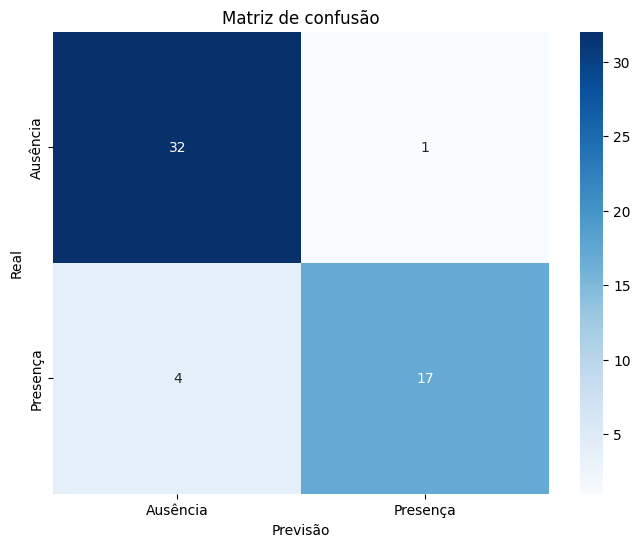

In [ ]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Ausência', 'Presença'], yticklabels=['Ausência', 'Presença'])
plt.xlabel('Previsão')
plt.ylabel('Real')
plt.title('Matriz de confusão')
plt.show()

- Verdadeiros Negativos (32): O modelo teve um bom desempenho em identificar corretamente a ausência da doença, com apenas 1 falso positivo (erro menor nesse sentido).

- Falsos Negativos (4): O número de falsos negativos é 4, o que significa que o modelo não identificou corretamente a presença da doença nesses casos. Isso pode ser preocupante, pois falsos negativos significam que pacientes com doença cardíaca não foram corretamente diagnosticados, o que pode ter implicações importantes em contextos clínicos.

- Acurácia geral: Como mostrado anteriormente, a acurácia é alta (cerca de 90,74%), mas o modelo parece ser melhor em prever a "ausência de doença" do que a "presença de doença", dado o maior número de verdadeiros negativos em comparação com verdadeiros positivos.

- Balanceamento das classes: A classe "Ausência" tem mais casos (33) do que a classe "Presença" (21), o que pode explicar parcialmente o bom desempenho do modelo em prever corretamente a ausência de doença.

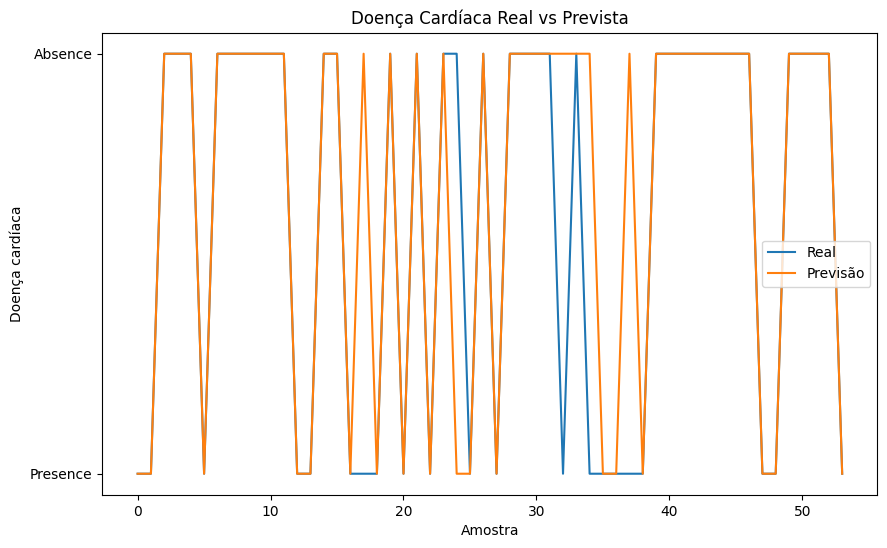

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(y_test.values, label='Real')
plt.plot(y_pred, label='Previsão')
plt.xlabel('Amostra')
plt.ylabel('Doença cardíaca')
plt.title('Doença Cardíaca Real vs Prevista')
plt.legend()
plt.show()

Ao observar o gráfico, é possível identificar onde o modelo errou. Isso pode indicar que, apesar da alta precisão, ainda existem casos em que o modelo falhou.